In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#Spliting the dataset in independent and dependent variables
X = df.iloc[:,:4].values
y = df['variety'].values

In [ ]:
# Convert categorical data into dummy/indicator variables.
y = pd.get_dummies(y)


In [ ]:
print(y)

     Setosa  Versicolor  Virginica
0         1           0          0
1         1           0          0
2         1           0          0
3         1           0          0
4         1           0          0
..      ...         ...        ...
145       0           0          1
146       0           0          1
147       0           0          1
148       0           0          1
149       0           0          1

[150 rows x 3 columns]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Split our data into the training sets and the testing sets
# Each set has a pair of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
## Import and create the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train our model with our training data.
dt.fit(X_train, y_train)
DecisionTreeClassifier()


DecisionTreeClassifier()

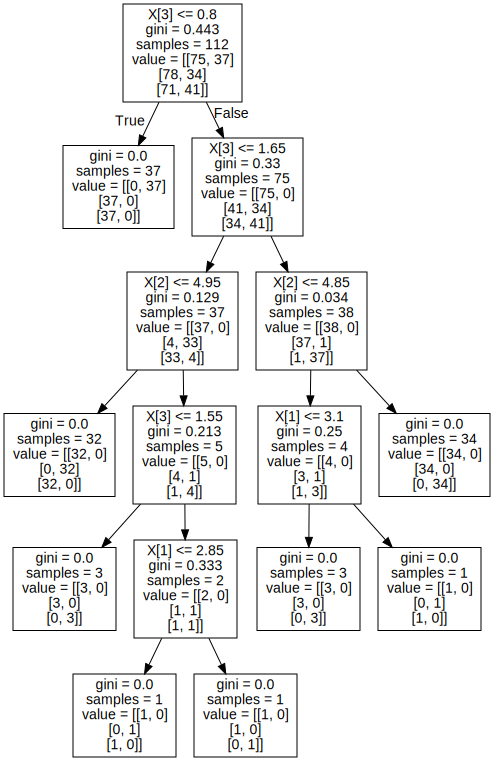

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(dt)))

Testing and measuring performance¶

The final step in this process is testing the resulting model with new data and seeing how it behaves. For this we are going to use the set of testing data we split from the main dataset earlier.



In [ ]:
# Call the .predict() function of the model and feed in the testing data
y_pred = dt.predict(X_test)


In [ ]:
# To analyze the accuarcy of our models predictions we are going to use a confusion matrix. You can read more about this 
#matrix online, but basically we want
# know how many samples of each type were correctly classified. The matrix is going to tell us how many samples of each 
#type were classified and to which target type.

from sklearn.metrics import confusion_matrix
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)


array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [ ]:
print(predictions)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]


In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:,:2]

array([[1, 0],
       [0, 1],
       [0, 0]], dtype=uint8)

In [ ]:
import sklearn.metrics as metrics
# Calculate the accuracy as our performance metric
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9736842105263158
